<a href="https://colab.research.google.com/github/widyadaridhyp/Titanic-Survival-Prediction/blob/main/Widyadari_Dhiya_Parahita_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# import data
df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Titanic-Survival-Prediction/refs/heads/main/Titanic.csv')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29
1,1,"Allison, Master. Hudson Trevor",male,"0,9167"
2,0,"Allison, Miss. Helen Loraine",female,2
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25


# Explaratory Data Analysis

## Cek Head dan Tail

Melihat data teratas dan terbawah

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  500 non-null    int64 
 1   name      500 non-null    object
 2   sex       500 non-null    object
 3   age       451 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [4]:
df['family'] = df['name'].str.split(',').str[0] #Meembuat kolom family
df['title'] = df['name'].str.split(', ').str[1].str.split('.').str[0] #Membuat kolom title

In [5]:
df.head()

,survived,name,sex,age,family,title
0,1,"Allen, Miss. Elisabeth Walton",female,29,Allen,Miss
1,1,"Allison, Master. Hudson Trevor",male,"0,9167",Allison,Master
2,0,"Allison, Miss. Helen Loraine",female,2,Allison,Miss
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30,Allison,Mr
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,Allison,Mrs


In [6]:
df.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev'], dtype=object)

In [7]:
df.tail()

,survived,name,sex,age,family,title
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24,Mallet,Mrs
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,Mangiavacchi,Mr
497,0,"Matthews, Mr. William John",male,30,Matthews,Mr
498,0,"Maybery, Mr. Frank Hubert",male,40,Maybery,Mr
499,0,"McCrae, Mr. Arthur Gordon",male,32,McCrae,Mr


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  500 non-null    int64 
 1   name      500 non-null    object
 2   sex       500 non-null    object
 3   age       451 non-null    object
 4   family    500 non-null    object
 5   title     500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


### Survived (Integer to Object)

Hal ini dikarenakan asumsi 0 dan 1 sebagai kategori di mana (1) survived dan (0) tidak survived/meninggal

In [9]:
df.survived = df.survived.astype('object')

### Age (Object to Numeric)

age berbentuk object sehingga perlu diganti menjadi numeric

In [10]:
df.age = df.age.str.replace(',','.', regex=False)

In [11]:
df.age = pd.to_numeric(df['age'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    object 
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
 4   family    500 non-null    object 
 5   title     500 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.6+ KB


age ternyata berubah menjadi float bukan integer

In [13]:
print(df[df['age'] < 1])

    survived                            name   sex     age      family   title
1          1  Allison, Master. Hudson Trevor  male  0.9167     Allison  Master
360        1   Caldwell, Master. Alden Gates  male  0.8333    Caldwell  Master
428        1       Hamalainen, Master. Viljo  male  0.6667  Hamalainen  Master


In [14]:
df[df['title']=='Master']

,survived,name,sex,age,family,title
1,1,"Allison, Master. Hudson Trevor",male,0.9167,Allison,Master
54,1,"Carter, Master. William Thornton II",male,11.0000,Carter,Master
94,1,"Dodge, Master. Washington",male,4.0000,Dodge,Master
249,1,"Ryerson, Master. John Borie",male,13.0000,Ryerson,Master
273,1,"Spedden, Master. Robert Douglas",male,6.0000,Spedden,Master
339,1,"Becker, Master. Richard F",male,1.0000,Becker,Master
360,1,"Caldwell, Master. Alden Gates",male,0.8333,Caldwell,Master
386,1,"Davies, Master. John Morgan Jr",male,8.0000,Davies,Master
399,1,"Drew, Master. Marshall Brines",male,8.0000,Drew,Master
428,1,"Hamalainen, Master. Viljo",male,0.6667,Hamalainen,Master


terdapat 3 anak laki-laki di bawah 1 tahun yang diusiakan dalam berbentuk float

## Summary

In [15]:
df.describe()

,age
count,451.000000
mean,35.917775
std,14.766454
min,0.666700
25%,24.000000
50%,35.000000
75%,47.000000
max,80.000000


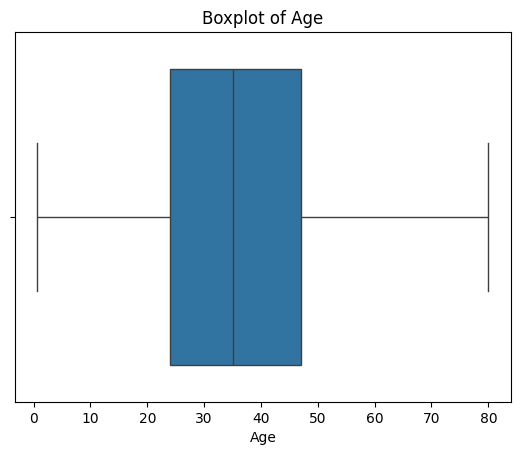

In [16]:
import seaborn as sns

sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    object 
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
 4   family    500 non-null    object 
 5   title     500 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.6+ KB


In [18]:
df_kategori = df.select_dtypes(include='object')
df_kategori.describe()

,survived,name,sex,family,title
count,500,500,500,500,500
unique,2,499,2,344,17
top,1,"Eustis, Miss. Elizabeth Mussey",male,Carter,Mr
freq,270,2,288,6,256


terdapat satu duplikasi jika dilihat berdasarkan namanya yang nanti akan pastikan di bagian drop duplicate

([<matplotlib.patches.Wedge at 0x7816e773fa10>,
 [Text(-0.13786666047887572, 1.0913261583634852, 'Not Survived'),
  Text(0.1378666257894263, -1.0913261627457846, 'Survived')],
 [Text(-0.0751999966248413, 0.59526881365281, '54.0%'),
  Text(0.07519997770332341, -0.5952688160431552, '46.0%')])

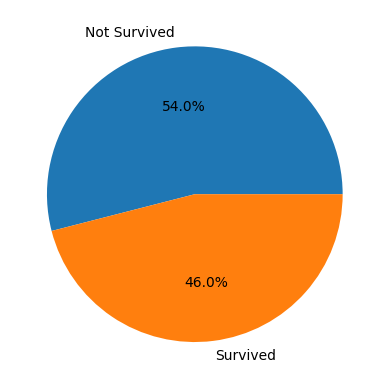

In [19]:
plt.pie(df['survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%')

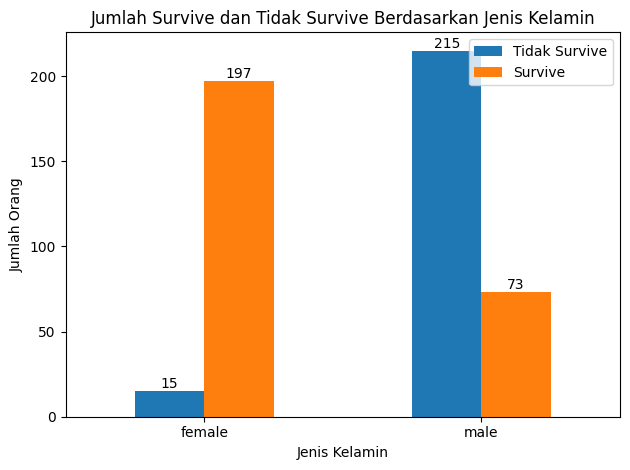

In [20]:
counts = df.groupby(['sex', 'survived']).size().unstack()

ax = counts.plot(kind='bar', stacked=False)
for container in ax.containers:
    ax.bar_label(container)

plt.title('Jumlah Survive dan Tidak Survive Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=0)
plt.legend(['Tidak Survive', 'Survive'])
plt.tight_layout()
plt.show()

## Drop Duplicate

In [21]:
df.duplicated().sum()

np.int64(1)

In [22]:
df[df.duplicated()]

,survived,name,sex,age,family,title
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,Eustis,Miss


terdapat 1 duplikasi sehingga kita hanya perlu menghapus saja salah satunya

In [23]:
df.drop_duplicates(inplace=True)

([<matplotlib.patches.Wedge at 0x7816e56124d0>,
 [Text(-0.13470552926636456, 1.0917208527755933, 'Not Survived'),
  Text(0.1347057548509009, -1.0917208249410877, 'Survived')],
 [Text(-0.07347574323619885, 0.5954841015139599, '53.9%'),
  Text(0.07347586628230957, -0.5954840863315023, '46.1%')])

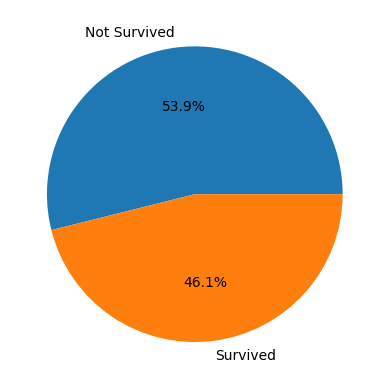

In [24]:
plt.pie(df['survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%')

## Missing Values

In [25]:
print(f'Missing Values Age: {df.age.isna().sum()/len(df) * 100}%')

Missing Values Age: 9.819639278557114%


Missing values di bawah 10% sebenarnya aman untuk didrop secara baris. Akan tetapi, kita juga dapat mempertimbangkan usia untuk Mrs dan Miss yang lebih jelas usianya dibandingkan untuk pria

In [26]:
df[df.age.isna()]['title'].unique().tolist()

['Mr', 'Dr', 'Mrs', 'Miss']

In [27]:
df[df.age.isna()]['title'].value_counts().T

,count
title,
Mr,34
Mrs,11
Miss,3
Dr,1


In [28]:
df[(df['title'] == 'Dr') & (df['age'].isna())]

,survived,name,sex,age,family,title
40,0,"Brewe, Dr. Arthur Jackson",male,NaN,Brewe,Dr


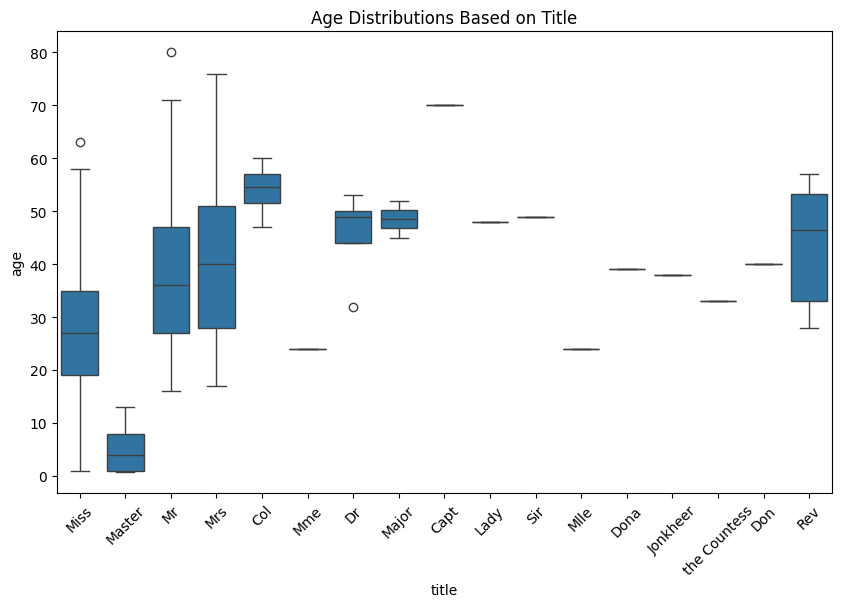

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='title', y='age', data=df)
plt.title('Age Distributions Based on Title')
plt.xticks(rotation=45)
plt.show()

### Akan dilihat distribusi untuk data missing values dan tanpa missing values

In [30]:
non_missing = df.dropna(subset=['age'])
missing = df[df['age'].isna()]

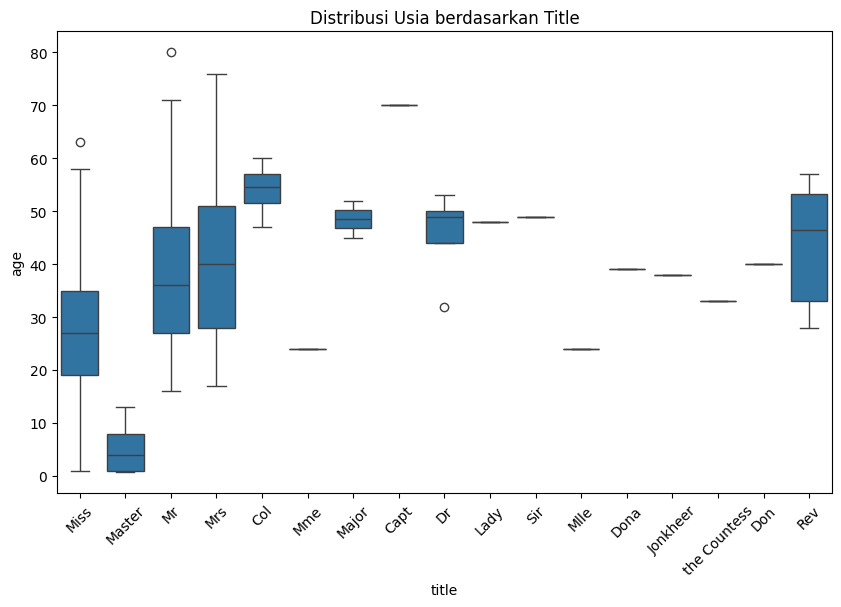

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='title', y='age', data=non_missing)
plt.title('Distribusi Usia berdasarkan Title')
plt.xticks(rotation=45)
plt.show()

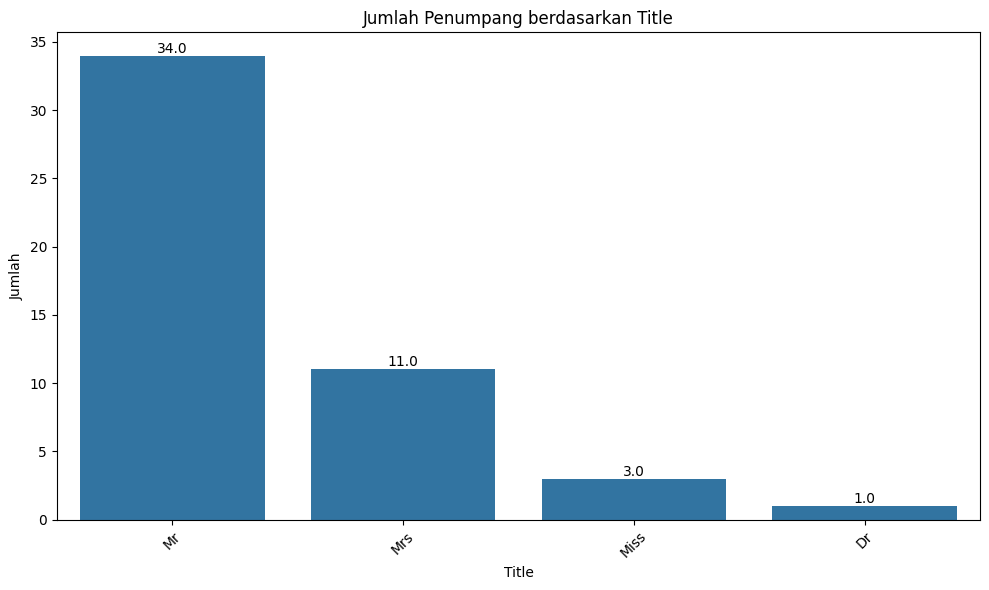

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='title', data=missing, order=missing['title'].value_counts().index)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Jumlah Penumpang berdasarkan Title')
plt.xlabel('Title')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Handling Missing Values dengan Imputasi Median Berdasarkan Title

In [33]:
df_impute = df.copy()

In [34]:
df_impute['age'] = df_impute['age'].fillna(df.groupby('title')['age'].transform('median'))

In [35]:
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    object 
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
 4   family    499 non-null    object 
 5   title     499 non-null    object 
dtypes: float64(1), object(5)
memory usage: 27.3+ KB


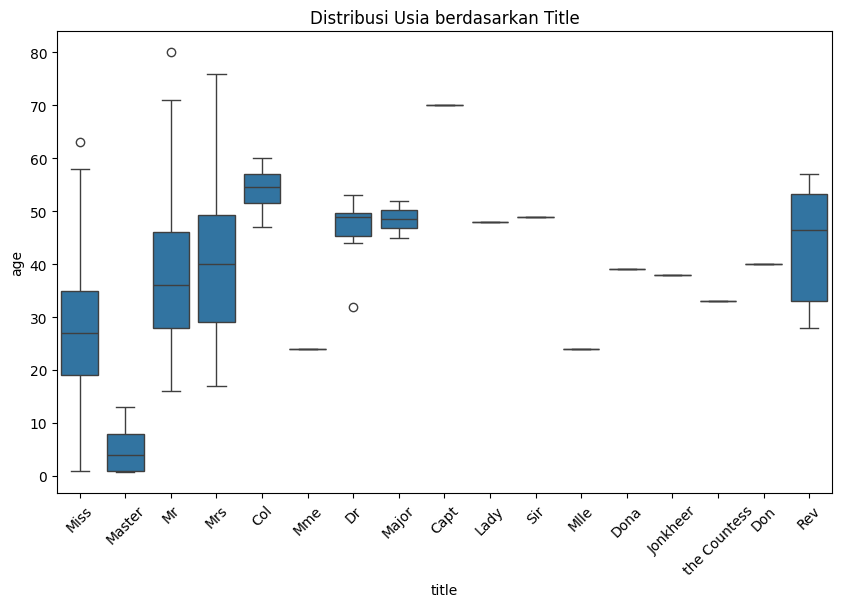

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='title', y='age', data=df_impute)
plt.title('Distribusi Usia berdasarkan Title')
plt.xticks(rotation=45)
plt.show()

## Variable

In [37]:
df_impute.survived.value_counts()

,count
survived,
1,269
0,230


In [38]:
df_impute.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev'], dtype=object)

In [39]:
df_impute.title = df_impute.title.replace('Mlle', 'Miss')
df_impute.title = df_impute.title.replace('Ms', 'Miss')
df_impute.title = df_impute.title.replace('Mme', 'Mrs')
df_impute.title = df_impute.title.replace(['the Countess', 'Lady', 'Dona', 'Jonkheer', 'Don','Sir'],'Royal')

## Chi Square Test

Analisis hubungan antara variabel dengan variabel survived

In [40]:
from scipy.stats import chi2_contingency

In [41]:
table = pd.crosstab(df_impute['survived'], df_impute['sex'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 220.89, p-value = 0.0000


terdapat hubungan antara sex dengan survived yang signifikan

In [42]:
table = pd.crosstab(df_impute['survived'], df_impute['title'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 252.62, p-value = 0.0000


terdapat hubungan antara survived dengan title yang signifikan

In [43]:
table = pd.crosstab(df_impute['title'], df_impute['sex'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 489.44, p-value = 0.0000


terdapat hubungan antara title dan sex yang signifikan

In [44]:
def categorize_age(age):
    if pd.isna(age):
        return np.nan
    elif age < 5:
        return 'Toddler'
    elif age < 10:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df_impute['age_category'] = df_impute['age'].apply(categorize_age)


In [45]:
table = pd.crosstab(df_impute['survived'], df_impute['age_category'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 16.16, p-value = 0.0028


In [46]:
table = pd.crosstab(df_impute['title'], df_impute['age_category'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 283.84, p-value = 0.0000


In [47]:
table = pd.crosstab(df_impute['survived'], df_impute['family'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 345.86, p-value = 0.4465


survive dan family tidak signifikan sehingga variabel family dapat dihapus

## Visualisasi

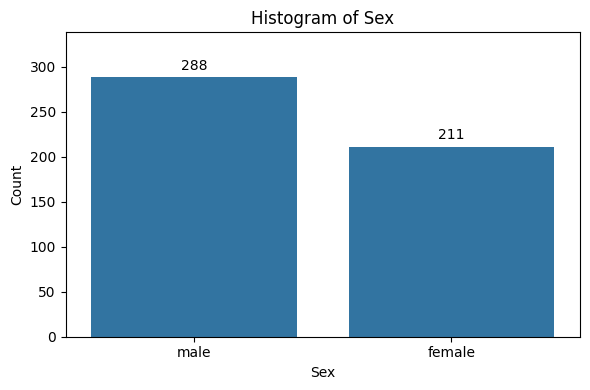

In [48]:
# Hitung jumlah masing-masing jenis kelamin
sex_counts = df['sex'].value_counts()

# Buat plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Tambahkan label angka di atas batang
for i, value in enumerate(sex_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Judul dan label sumbu
plt.title('Histogram of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.ylim(0, max(sex_counts.values) + 50)  # supaya teks tidak kepotong
plt.tight_layout()
plt.show()

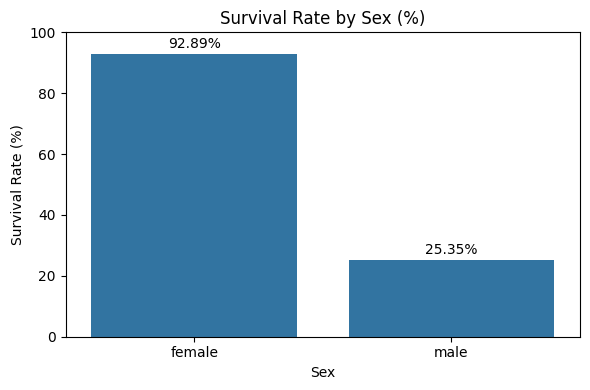

In [49]:
# Hitung persentase survival untuk tiap jenis kelamin
survival_by_sex = df.groupby('sex')['survived'].mean() * 100  # persen

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)

# Tambahkan label persentase
for i, value in enumerate(survival_by_sex.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.title('Survival Rate by Sex (%)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Sex')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

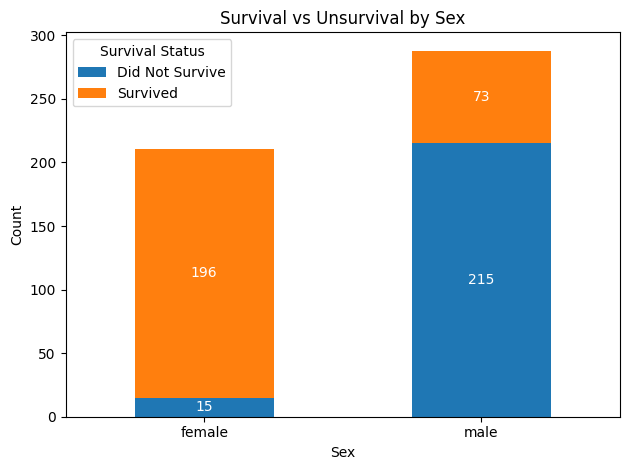

In [80]:
sex_survival_counts = df.groupby(['sex', 'survived']).size().unstack(fill_value=0)

# Plot stacked bar chart
ax = sex_survival_counts.plot(kind='bar', stacked=True)

plt.title('Survival vs Unsurvival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'], title='Survival Status')
plt.xticks(rotation=0)

# Tambahkan label angka di atas setiap stack
for i, (index, row) in enumerate(sex_survival_counts.iterrows()):
    bottom = 0
    for j, value in enumerate(row):
        ax.text(i, bottom + value / 2, str(int(value)), ha='center', va='center', fontsize=10, color='white')
        bottom += value

plt.tight_layout()
plt.show()

In [51]:
# Atur urutan kategori umur
order = ['Toddler', 'Child', 'Teenager', 'Adult', 'Senior']
df_impute['age_category'] = pd.Categorical(df_impute['age_category'], categories=order, ordered=True)

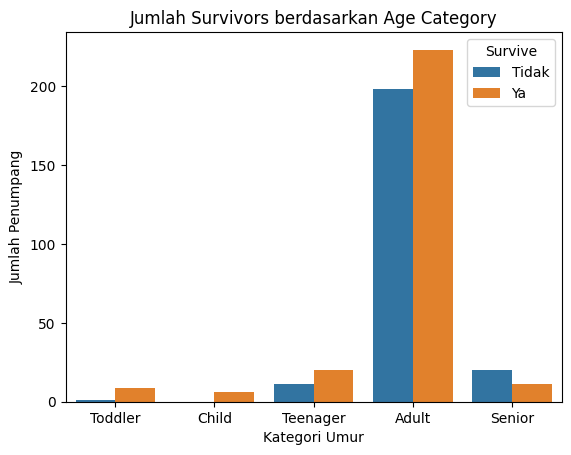

In [52]:
# Visualisasi: Bar chart jumlah yang survive per kategori umur
sns.countplot(data=df_impute, x='age_category', hue='survived')
plt.title('Jumlah Survivors berdasarkan Age Category')
plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survive', labels=['Tidak', 'Ya'])
plt.show()

<ipython-input-53-c7a03515d455>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df_impute.groupby(['age_category', 'sex'])['survived'].mean().reset_index()


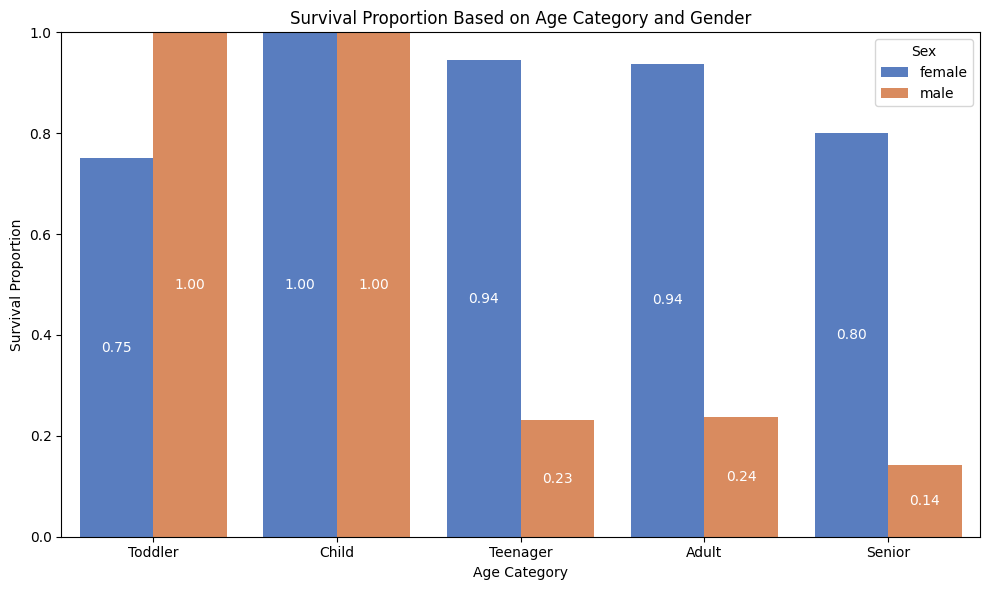

In [53]:
# Hitung proporsi survive
survival_rate = df_impute.groupby(['age_category', 'sex'])['survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=survival_rate,
    x='age_category', y='survived', hue='sex',
    palette='muted',
    order=order
)

# Tambahkan nilai proporsi di dalam batang
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.5,  # posisinya setengah dari tinggi bar
            f"{height:.2f}",
            ha='center', va='center', fontsize=10, color='white'
        )

plt.title('Survival Proportion Based on Age Category and Gender')
plt.ylabel('Survival Proportion')
plt.xlabel('Age Category')
plt.ylim(0, 1)
plt.legend(title='Sex')
plt.tight_layout()

plt.show()

<ipython-input-88-2d884e40944f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate = df_impute.groupby(['age_category', 'sex'])['survived'].apply(lambda x: 1 - x.mean()).reset_index(name='death_rate')


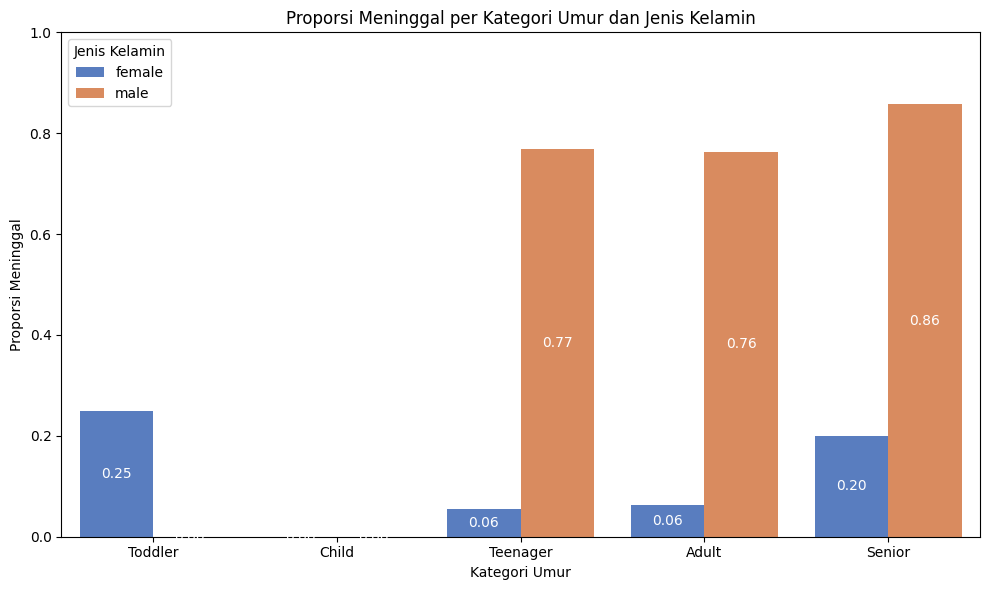

In [88]:
death_rate = df_impute.groupby(['age_category', 'sex'])['survived'].apply(lambda x: 1 - x.mean()).reset_index(name='death_rate')
# Buat barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=death_rate,
    x='age_category', y='death_rate', hue='sex',
    palette='muted',
    order=order
)

# Tambahkan nilai proporsi di dalam batang
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.5,
            f"{height:.2f}",
            ha='center', va='center', fontsize=10, color='white'
        )

plt.title('Proporsi Meninggal per Kategori Umur dan Jenis Kelamin')
plt.ylabel('Proporsi Meninggal')
plt.xlabel('Kategori Umur')
plt.ylim(0, 1)
plt.legend(title='Jenis Kelamin')
plt.tight_layout()
plt.show()

In [55]:
df_impute.age_category.unique()

['Adult', 'Toddler', 'Senior', 'Teenager', 'Child']
Categories (5, object): ['Toddler' < 'Child' < 'Teenager' < 'Adult' < 'Senior']

<ipython-input-56-541f16ceb92d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=death_by_title, x='title', y='death_rate', palette='Blues_d')


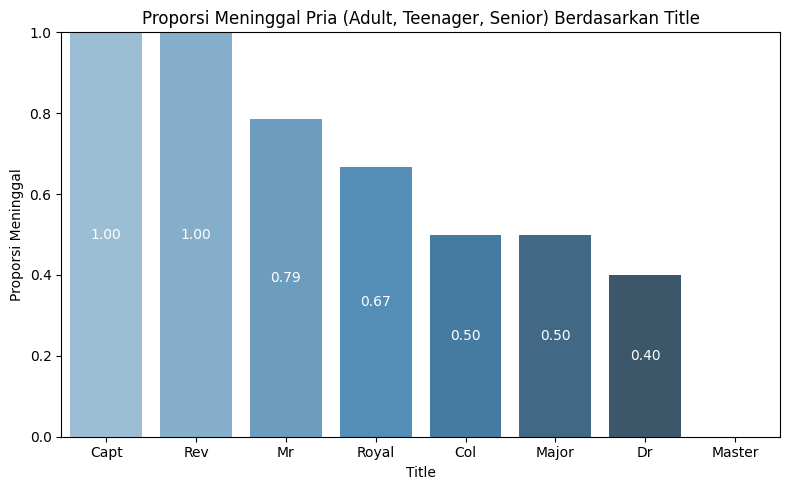

In [56]:
filtered_df = df_impute[
    (df_impute['sex'] == 'male') &
    (df_impute['age_category'].isin(['Adult', 'Teenager', 'Senior']))
]

# Hitung proporsi meninggal per title
death_by_title = (
    filtered_df.groupby('title')['survived']
    .apply(lambda x: 1 - x.mean())
    .reset_index(name='death_rate')
    .sort_values(by='death_rate', ascending=False)
)

# Buat barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=death_by_title, x='title', y='death_rate', palette='Blues_d')

# Tambahkan label nilai rate di tengah batang
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height * 0.5,
                f"{height:.2f}",
                ha='center', va='center', fontsize=10, color='white'
            )

plt.title('Proporsi Meninggal Pria (Adult, Teenager, Senior) Berdasarkan Title')
plt.ylabel('Proporsi Meninggal')
plt.xlabel('Title')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

<ipython-input-57-4e4c363bf2e7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['title', 'age_category'])['survived']


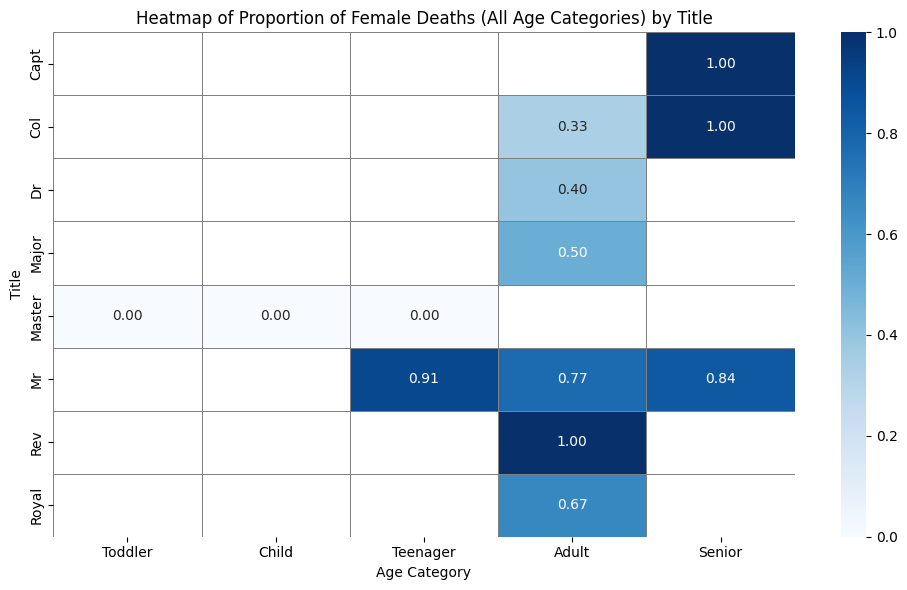

In [57]:
# Filter: hanya pria (semua age_category)
filtered_df_male_all = df_impute[df_impute['sex'] == 'male']

# Hitung proporsi meninggal per title dan age_category
death_heatmap_data_male_all = (
    filtered_df_male_all
    .groupby(['title', 'age_category'])['survived']
    .apply(lambda x: 1 - x.mean())
    .reset_index(name='death_rate')
)

# Pastikan urutan age_category konsisten
age_order = ['Toddler', 'Child', 'Teenager', 'Adult', 'Senior']
death_heatmap_data_male_all['age_category'] = pd.Categorical(death_heatmap_data_male_all['age_category'], categories=age_order, ordered=True)

# Pivot untuk heatmap
heatmap_pivot_male_all = death_heatmap_data_male_all.pivot(index='title', columns='age_category', values='death_rate')

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_pivot_male_all,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=1
)

plt.title('Heatmap of Proportion of Female Deaths (All Age Categories) by Title')
plt.xlabel('Age Category')
plt.ylabel('Title')
plt.tight_layout()
plt.show()


In [58]:
# Filter: hanya laki-laki (semua age_category)
filtered_df_male_all = df_impute[df_impute['sex'] == 'male']

# Hitung jumlah yang meninggal per title dan age_category
death_count_data_male_all = (
    filtered_df_male_all[filtered_df_male_all['survived'] == 0]
    .groupby(['title', 'age_category'])
    .size()
    .reset_index(name='death_count')
)

# Filter hanya yang death_count > 0
death_count_data_male_all = death_count_data_male_all[death_count_data_male_all['death_count'] > 0]

# Tampilkan hasil groupby
print(death_count_data_male_all.sort_values(by=['title', 'age_category']))


    title age_category  death_count
4    Capt       Senior            1
8     Col        Adult            1
9     Col       Senior            1
13     Dr        Adult            2
18  Major        Adult            1
22     Mr     Teenager           10
23     Mr        Adult          175
24     Mr       Senior           16
28    Rev        Adult            6
33  Royal        Adult            2


<ipython-input-58-25c694128985>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['title', 'age_category'])


In [59]:
df.columns

Index(['survived', 'name', 'sex', 'age', 'family', 'title'], dtype='object')

In [60]:
df_impute[(df_impute['title']=='Mr')&(df_impute['age_category'] == 'Teenager') & (df_impute['survived'] == 1)]

,survived,name,sex,age,family,title,age_category
295,1,"Thayer, Mr. John Borland Jr",male,17.0,Thayer,Mr,Teenager


In [61]:
df_impute[df_impute['family']=='Thayer']

,survived,name,sex,age,family,title,age_category
294,0,"Thayer, Mr. John Borland",male,49.0,Thayer,Mr,Adult
295,1,"Thayer, Mr. John Borland Jr",male,17.0,Thayer,Mr,Teenager
296,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,Thayer,Mrs,Adult


In [62]:
families = df_impute[(df_impute['title'] == 'Mr') &
                     (df_impute['age_category'] == 'Adult') &
                     (df_impute['survived'] == 1)]['family'].unique()

df_impute[df_impute['family'].isin(families)]

,survived,name,sex,age,family,title,age_category
5,1,"Anderson, Mr. Harry",male,48.0000,Anderson,Mr,Adult
20,1,"Beckwith, Mr. Richard Leonard",male,37.0000,Beckwith,Mr,Adult
21,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0000,Beckwith,Mrs,Adult
22,1,"Behr, Mr. Karl Howell",male,26.0000,Behr,Mr,Adult
26,1,"Bishop, Mr. Dickinson H",male,25.0000,Bishop,Mr,Adult
27,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0000,Bishop,Mrs,Adult
29,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0000,Bjornstrom-Steffansson,Mr,Adult
31,1,"Blank, Mr. Henry",male,40.0000,Blank,Mr,Adult
37,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,36.0000,Bradley,Mr,Adult
47,1,"Calderhead, Mr. Edward Pennington",male,42.0000,Calderhead,Mr,Adult


In [63]:
df_impute[(df_impute['title']=='Mr')&(df_impute['age_category'] == 'Teenager') & (df_impute['survived'] == 0)]

,survived,name,sex,age,family,title,age_category
53,0,"Carrau, Mr. Jose Pedro",male,17.0,Carrau,Mr,Teenager
228,0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,Penasco y Castellana,Mr,Teenager
326,0,"Andrew, Mr. Edgardo Samuel",male,18.0,Andrew,Mr,Teenager
331,0,"Bailey, Mr. Percy Andrew",male,18.0,Bailey,Mr,Teenager
387,0,"Davies, Mr. Charles Henry",male,18.0,Davies,Mr,Teenager
391,0,"Deacon, Mr. Percy William",male,17.0,Deacon,Mr,Teenager
395,0,"Dibden, Mr. William",male,18.0,Dibden,Mr,Teenager
406,0,"Fahlstrom, Mr. Arne Jonas",male,18.0,Fahlstrom,Mr,Teenager
409,0,"Fillbrook, Mr. Joseph Charles",male,18.0,Fillbrook,Mr,Teenager
417,0,"Gaskell, Mr. Alfred",male,16.0,Gaskell,Mr,Teenager


In [64]:
df_impute[df_impute['family'].isin(['Carrau','Penasco y Castellana','Andrew','Bailey','Davies','Deacon','Dibden','Fahlstorm','Filbrook','Gaskell'])]

,survived,name,sex,age,family,title,age_category
52,0,"Carrau, Mr. Francisco M",male,28.0,Carrau,Mr,Adult
53,0,"Carrau, Mr. Jose Pedro",male,17.0,Carrau,Mr,Teenager
228,0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,Penasco y Castellana,Mr,Teenager
229,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,Penasco y Castellana,Mrs,Teenager
326,0,"Andrew, Mr. Edgardo Samuel",male,18.0,Andrew,Mr,Teenager
327,0,"Andrew, Mr. Frank Thomas",male,25.0,Andrew,Mr,Adult
331,0,"Bailey, Mr. Percy Andrew",male,18.0,Bailey,Mr,Teenager
386,1,"Davies, Master. John Morgan Jr",male,8.0,Davies,Master,Child
387,0,"Davies, Mr. Charles Henry",male,18.0,Davies,Mr,Teenager
388,1,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,Davies,Mrs,Adult


In [65]:
df_impute[(df_impute['title']=='Mr')&(df_impute['age_category'] == 'Adult') & (df_impute['survived'] == 0)]

,survived,name,sex,age,family,title,age_category
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,Allison,Mr,Adult
7,0,"Andrews, Mr. Thomas Jr",male,39.0,Andrews,Mr,Adult
15,0,"Baumann, Mr. John D",male,36.0,Baumann,Mr,Adult
16,0,"Baxter, Mr. Quigg Edmond",male,24.0,Baxter,Mr,Adult
19,0,"Beattie, Mr. Thomson",male,36.0,Beattie,Mr,Adult
25,0,"Birnbaum, Mr. Jakob",male,25.0,Birnbaum,Mr,Adult
30,0,"Blackwell, Mr. Stephen Weart",male,45.0,Blackwell,Mr,Adult
34,0,"Borebank, Mr. John James",male,42.0,Borebank,Mr,Adult
38,0,"Brady, Mr. John Bertram",male,41.0,Brady,Mr,Adult
39,0,"Brandeis, Mr. Emil",male,48.0,Brandeis,Mr,Adult


In [66]:
df_impute[(df_impute['title']=='Royal')&(df_impute['age_category'] == 'Adult') & (df_impute['survived'] == 0)]

,survived,name,sex,age,family,title,age_category
234,0,"Reuchlin, Jonkheer. John George",male,38.0,Reuchlin,Royal,Adult
299,0,"Uruchurtu, Don. Manuel E",male,40.0,Uruchurtu,Royal,Adult


<ipython-input-67-04de1f705ae3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=death_by_title_female, x='title', y='death_rate', palette='Reds_d')


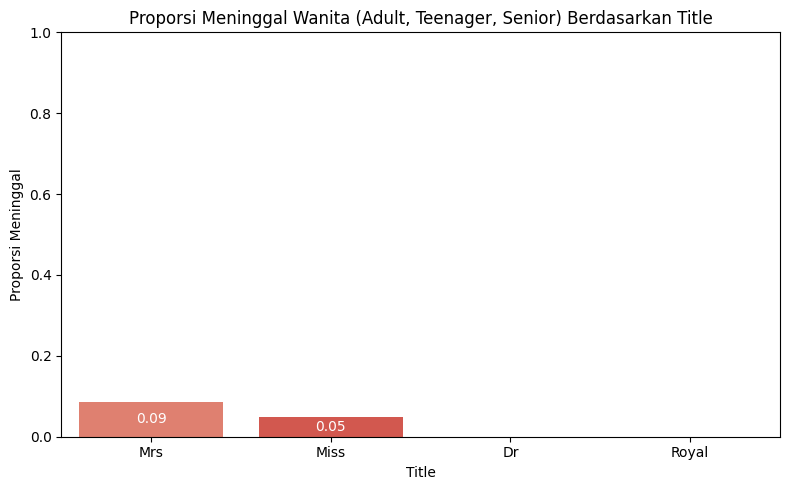

In [67]:
# Filter: hanya wanita Adult, Teenager, dan Senior
filtered_df_female = df_impute[
    (df_impute['sex'] == 'female') &
    (df_impute['age_category'].isin(['Adult', 'Teenager', 'Senior']))
]

# Hitung proporsi meninggal per title
death_by_title_female = (
    filtered_df_female.groupby('title')['survived']
    .apply(lambda x: 1 - x.mean())
    .reset_index(name='death_rate')
    .sort_values(by='death_rate', ascending=False)
)

# Buat barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=death_by_title_female, x='title', y='death_rate', palette='Reds_d')

# Tambahkan label nilai rate di tengah batang
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height * 0.5,
                f"{height:.2f}",
                ha='center', va='center', fontsize=10, color='white'
            )

plt.title('Proporsi Meninggal Wanita (Adult, Teenager, Senior) Berdasarkan Title')
plt.ylabel('Proporsi Meninggal')
plt.xlabel('Title')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

<ipython-input-68-4d921ebede1b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['title', 'age_category'])['survived']


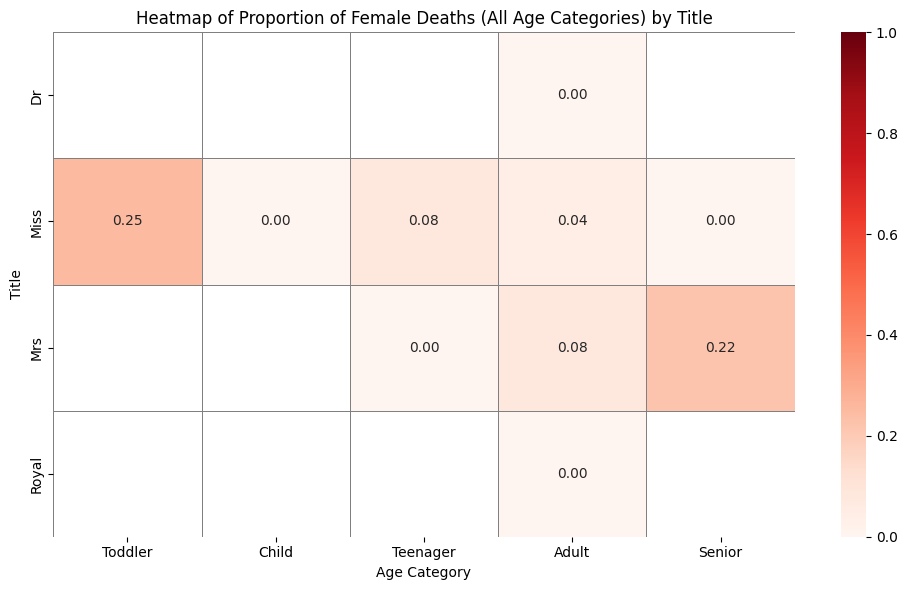

In [68]:
# Filter: hanya wanita (semua age_category)
filtered_df_female_all = df_impute[df_impute['sex'] == 'female']

# Hitung proporsi meninggal per title dan age_category
death_heatmap_data_female_all = (
    filtered_df_female_all
    .groupby(['title', 'age_category'])['survived']
    .apply(lambda x: 1 - x.mean())
    .reset_index(name='death_rate')
)

# Pastikan urutan age_category konsisten
age_order = ['Toddler', 'Child', 'Teenager', 'Adult', 'Senior']
death_heatmap_data_female_all['age_category'] = pd.Categorical(death_heatmap_data_female_all['age_category'], categories=age_order, ordered=True)

# Pivot untuk heatmap
heatmap_pivot_female_all = death_heatmap_data_female_all.pivot(index='title', columns='age_category', values='death_rate')

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_pivot_female_all,
    annot=True,
    fmt=".2f",
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=1
)

plt.title('Heatmap of Proportion of Female Deaths (All Age Categories) by Title')
plt.xlabel('Age Category')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

In [69]:
# Filter: hanya wanita (semua age_category)
filtered_df_female_all = df_impute[df_impute['sex'] == 'female']

# Hitung jumlah yang meninggal per title dan age_category
death_count_data_female_all = (
    filtered_df_female_all[filtered_df_female_all['survived'] == 0]
    .groupby(['title', 'age_category'])
    .size()
    .reset_index(name='death_count')
)

# Filter hanya yang death_count > 0
death_count_data_female_all = death_count_data_female_all[death_count_data_female_all['death_count'] > 0]

# Tampilkan hasil groupby
print(death_count_data_female_all.sort_values(by=['title', 'age_category']))


  title age_category  death_count
0  Miss      Toddler            1
2  Miss     Teenager            1
3  Miss        Adult            3
8   Mrs        Adult            8
9   Mrs       Senior            2


<ipython-input-69-5e5cceee3f86>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['title', 'age_category'])


In [70]:
df_impute[(df_impute['title'] == 'Miss') & (df_impute['survived'] == 0)]

,survived,name,sex,age,family,title,age_category
2,0,"Allison, Miss. Helen Loraine",female,2.0,Allison,Miss,Toddler
105,0,"Evans, Miss. Edith Corse",female,36.0,Evans,Miss,Adult
169,0,"Isham, Miss. Ann Elizabeth",female,50.0,Isham,Miss,Adult
412,0,"Funk, Miss. Annie Clemmer",female,38.0,Funk,Miss,Adult
446,0,"Hiltunen, Miss. Marta",female,18.0,Hiltunen,Miss,Teenager


In [71]:
df_impute[df_impute['family'].isin(['Allison', 'Evan', 'Funk', 'Hiltunen','Isham'])]

,survived,name,sex,age,family,title,age_category
1,1,"Allison, Master. Hudson Trevor",male,0.9167,Allison,Master,Toddler
2,0,"Allison, Miss. Helen Loraine",female,2.0000,Allison,Miss,Toddler
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,Allison,Mr,Adult
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,Allison,Mrs,Adult
169,0,"Isham, Miss. Ann Elizabeth",female,50.0000,Isham,Miss,Adult
412,0,"Funk, Miss. Annie Clemmer",female,38.0000,Funk,Miss,Adult
446,0,"Hiltunen, Miss. Marta",female,18.0000,Hiltunen,Miss,Teenager


In [72]:
df_impute[(df_impute['title'] == 'Mrs') & (df_impute['survived'] == 0)]

,survived,name,sex,age,family,title,age_category
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,Allison,Mrs,Adult
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,Straus,Mrs,Senior
366,0,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,Carter,Mrs,Adult
370,0,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",female,29.0,Chapman,Mrs,Adult
382,0,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,Corbett,Mrs,Adult
383,0,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,40.0,Corey,Mrs,Adult
457,0,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,Howard,Mrs,Senior
469,0,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,Karnes,Mrs,Adult
476,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,Lahtinen,Mrs,Adult
491,0,"Mack, Mrs. (Mary)",female,57.0,Mack,Mrs,Adult


In [73]:
df[df['family'].isin(['Allison', 'Straus', 'Carter', 'Chapman','Corbett','Corey','Howard','Karnes','Lahtinen','Mack'])]

,survived,name,sex,age,family,title
1,1,"Allison, Master. Hudson Trevor",male,0.9167,Allison,Master
2,0,"Allison, Miss. Helen Loraine",female,2.0000,Allison,Miss
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,Allison,Mr
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,Allison,Mrs
54,1,"Carter, Master. William Thornton II",male,11.0000,Carter,Master
55,1,"Carter, Miss. Lucile Polk",female,14.0000,Carter,Miss
56,1,"Carter, Mr. William Ernest",male,36.0000,Carter,Mr
57,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0000,Carter,Mrs
285,0,"Straus, Mr. Isidor",male,67.0000,Straus,Mr
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0000,Straus,Mrs


# Feature Encoding

In [70]:
df_impute.columns

Index(['survived', 'name', 'sex', 'age', 'family', 'title', 'age_category'], dtype='object')

In [71]:
df_impute.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Dr', 'Major', 'Capt',
       'Royal', 'Rev'], dtype=object)

In [72]:
df_impute.age_category.unique()

['Adult', 'Toddler', 'Senior', 'Teenager', 'Child']
Categories (5, object): ['Toddler' < 'Child' < 'Teenager' < 'Adult' < 'Senior']

In [73]:
from sklearn.preprocessing import LabelEncoder
df_impute['age_category_encoded'] = df_impute['age_category'].cat.codes

In [74]:
df_impute.head()

,survived,name,sex,age,family,title,age_category,age_category_encoded
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,Allen,Miss,Adult,3
1,1,"Allison, Master. Hudson Trevor",male,0.9167,Allison,Master,Toddler,0
2,0,"Allison, Miss. Helen Loraine",female,2.0000,Allison,Miss,Toddler,0
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,Allison,Mr,Adult,3
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,Allison,Mrs,Adult,3


In [75]:
df_impute['sex'] = pd.Categorical(df_impute['sex'], categories=['female', 'male'], ordered=True)

In [76]:
df_encoded = pd.get_dummies(df_impute, columns=['sex', 'title'], drop_first=True)

In [77]:
df_encoded.head()

,survived,name,age,family,age_category,age_category_encoded,sex_male,title_Col,title_Dr,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_Royal
0,1,"Allen, Miss. Elisabeth Walton",29.0000,Allen,Adult,3,False,False,False,False,False,True,False,False,False,False
1,1,"Allison, Master. Hudson Trevor",0.9167,Allison,Toddler,0,True,False,False,False,True,False,False,False,False,False
2,0,"Allison, Miss. Helen Loraine",2.0000,Allison,Toddler,0,False,False,False,False,False,True,False,False,False,False
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,Allison,Adult,3,True,False,False,False,False,False,True,False,False,False
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,Allison,Adult,3,False,False,False,False,False,False,False,True,False,False


In [78]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [86]:
df_encoded = df_encoded.rename(columns={'sex_male': 'sex_female'})
df_encoded['sex_female'] = 1 - df_encoded['sex_female']

In [87]:
df_encoded.head()

,survived,name,age,family,age_category,age_category_encoded,sex_female,title_Col,title_Dr,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_Royal
0,1,"Allen, Miss. Elisabeth Walton",29.0000,Allen,Adult,3,1,0,0,0,0,1,0,0,0,0
1,1,"Allison, Master. Hudson Trevor",0.9167,Allison,Toddler,0,0,0,0,0,1,0,0,0,0,0
2,0,"Allison, Miss. Helen Loraine",2.0000,Allison,Toddler,0,1,0,0,0,0,1,0,0,0,0
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,Allison,Adult,3,0,0,0,0,0,0,1,0,0,0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,Allison,Adult,3,1,0,0,0,0,0,0,1,0,0


# Prediction

## Median Imputation

### Tanpa SMOTE

In [88]:
df_encoded.columns

Index(['survived', 'name', 'age', 'family', 'age_category',
       'age_category_encoded', 'sex_female', 'title_Col', 'title_Dr',
       'title_Major', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_Rev', 'title_Royal'],
      dtype='object')

In [89]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   survived              499 non-null    int64   
 1   name                  499 non-null    object  
 2   age                   499 non-null    float64 
 3   family                499 non-null    object  
 4   age_category          499 non-null    category
 5   age_category_encoded  499 non-null    int8    
 6   sex_female            499 non-null    int64   
 7   title_Col             499 non-null    int64   
 8   title_Dr              499 non-null    int64   
 9   title_Major           499 non-null    int64   
 10  title_Master          499 non-null    int64   
 11  title_Miss            499 non-null    int64   
 12  title_Mr              499 non-null    int64   
 13  title_Mrs             499 non-null    int64   
 14  title_Rev             499 non-null    int64   
 15  title_Royal

In [90]:
df_encoded.survived = df_encoded.survived.astype(int)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x = df_encoded.drop(columns=['survived', 'name','age','family','age_category'])
y = df_encoded['survived']


Logistic Regression
-------------------
CV Precision: 91.96%
Validation Precision: 87.5%


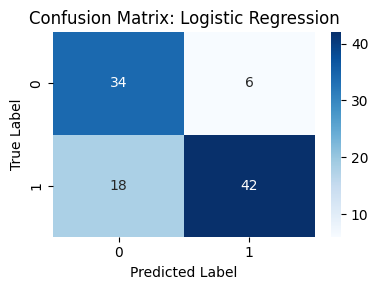

Feature Importance:
                 Feature  Importance
1             sex_female    1.716290
7               title_Mr    1.420890
9              title_Rev    1.184059
5           title_Master    1.176492
8              title_Mrs    0.740469
6             title_Miss    0.714116
3               title_Dr    0.559650
2              title_Col    0.400012
4            title_Major    0.394264
10           title_Royal    0.183126
0   age_category_encoded    0.179028


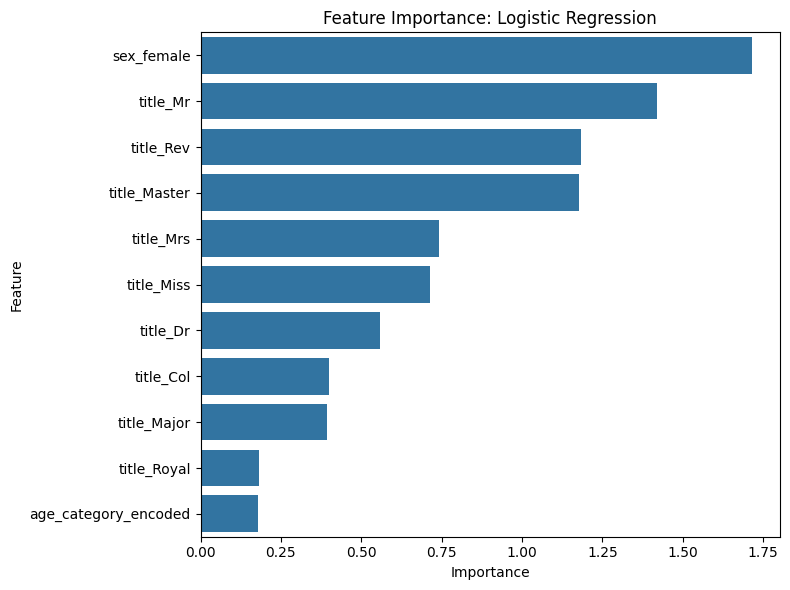


KNN
---
CV Precision: 92.94%
Validation Precision: 89.13%


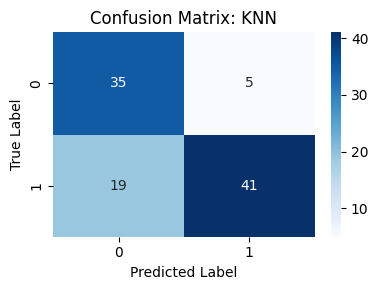

Feature Importance:
                 Feature  Importance
0   age_category_encoded       0.033
1             sex_female       0.012
5           title_Master       0.009
7               title_Mr       0.006
6             title_Miss       0.003
4            title_Major       0.001
10           title_Royal       0.000
9              title_Rev      -0.002
8              title_Mrs      -0.003
2              title_Col      -0.010
3               title_Dr      -0.010


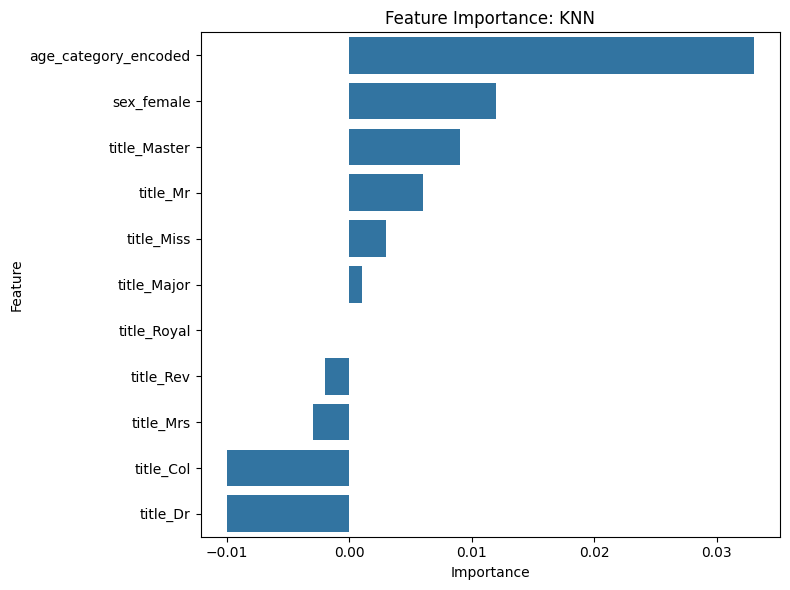


SVM
---
CV Precision: 92.94%
Validation Precision: 91.11%


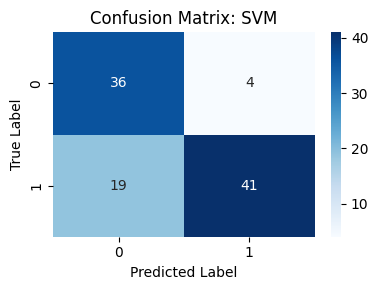

Feature Importance:
                 Feature  Importance
1             sex_female       0.032
5           title_Master       0.012
0   age_category_encoded       0.011
6             title_Miss       0.004
8              title_Mrs       0.002
2              title_Col       0.000
4            title_Major       0.000
10           title_Royal       0.000
9              title_Rev       0.000
7               title_Mr      -0.001
3               title_Dr      -0.010


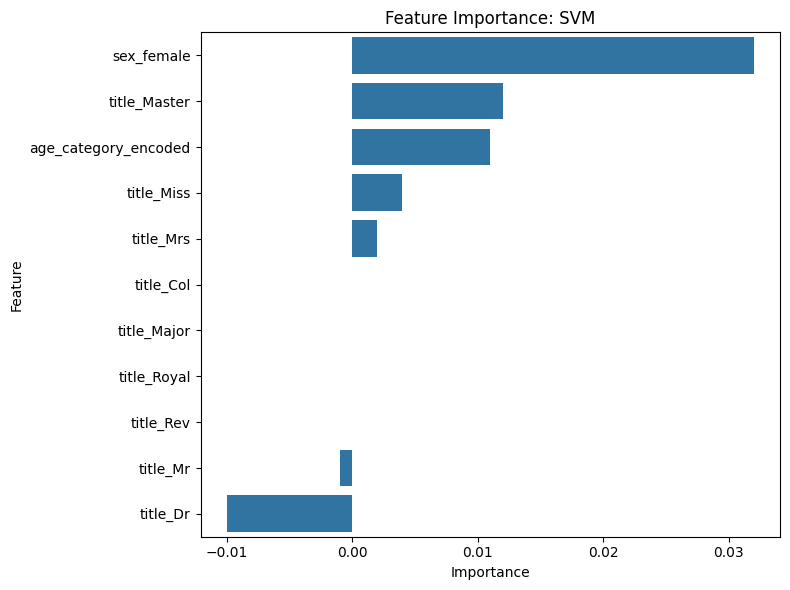


Naive Bayes
-----------
CV Precision: 92.02%
Validation Precision: 87.5%


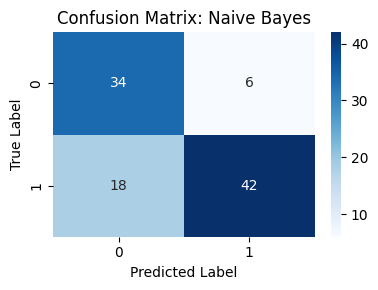

Feature Importance:
                 Feature  Importance
1             sex_female       0.079
8              title_Mrs       0.035
6             title_Miss       0.030
5           title_Master       0.013
7               title_Mr       0.011
0   age_category_encoded       0.007
4            title_Major       0.005
10           title_Royal       0.000
9              title_Rev      -0.002
2              title_Col      -0.006
3               title_Dr      -0.011


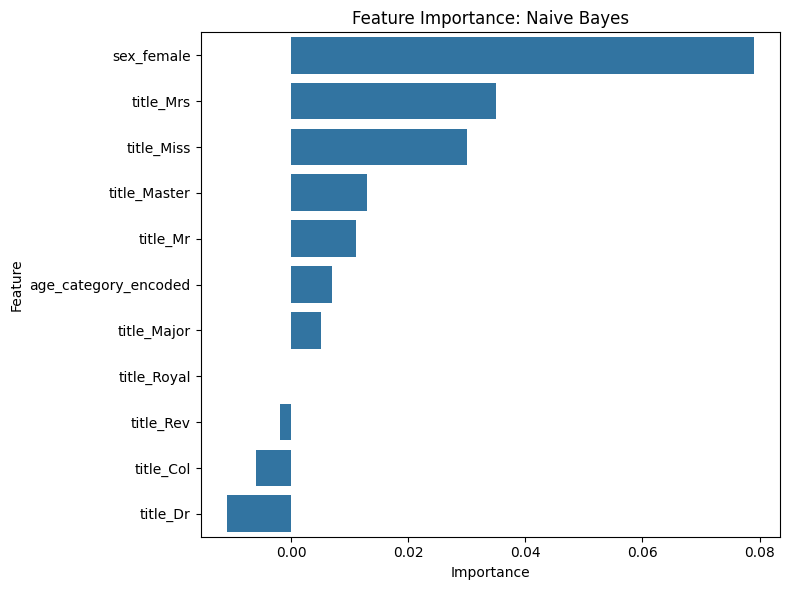


Decision Tree
-------------
CV Precision: 92.36%
Validation Precision: 87.5%


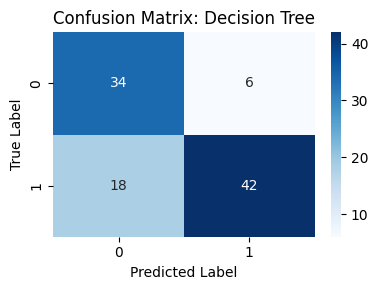

Feature Importance:
                 Feature  Importance
1             sex_female    0.876391
5           title_Master    0.078197
3               title_Dr    0.022327
2              title_Col    0.011874
0   age_category_encoded    0.005336
9              title_Rev    0.002964
7               title_Mr    0.001197
10           title_Royal    0.001192
6             title_Miss    0.000433
8              title_Mrs    0.000086
4            title_Major    0.000000


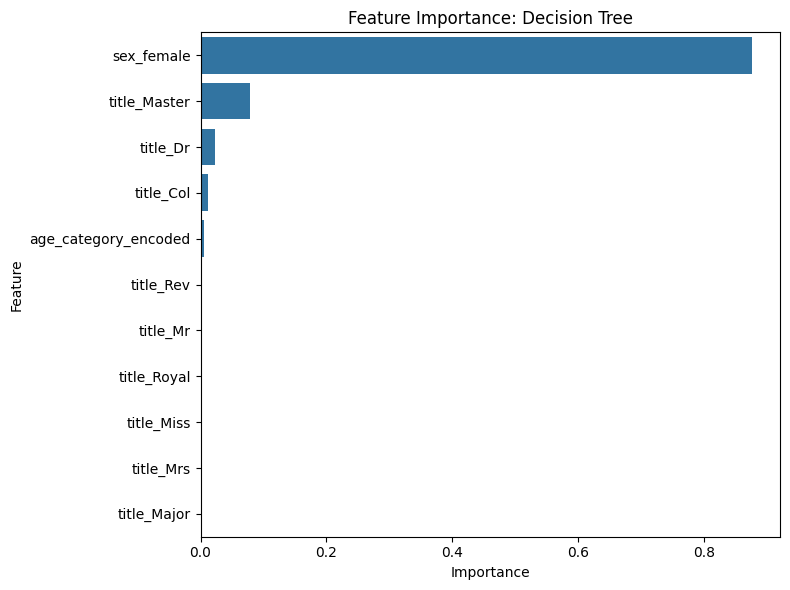


Random Forest
-------------
CV Precision: 92.48%
Validation Precision: 87.5%


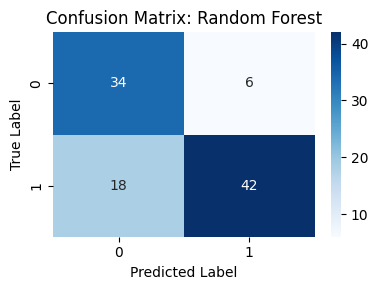

Feature Importance:
                 Feature  Importance
1             sex_female    0.338903
7               title_Mr    0.330990
8              title_Mrs    0.127182
6             title_Miss    0.086345
0   age_category_encoded    0.044116
9              title_Rev    0.020318
5           title_Master    0.019067
3               title_Dr    0.013399
2              title_Col    0.007854
10           title_Royal    0.006697
4            title_Major    0.005129


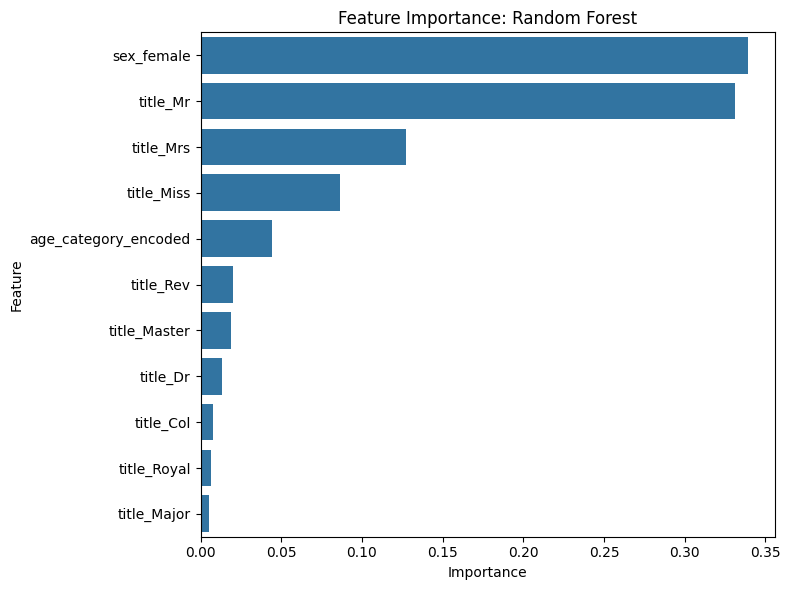

In [96]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Split data
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=32
)

# Scoring
scoring = {
    'precision': make_scorer(precision_score)
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    print(f"\n{name}")
    print("-" * len(name))

    # Cross-validation
    scores = cross_validate(model, x_train, y_train, cv=5, scoring=scoring)
    avg_precision = round(np.mean(scores['test_precision']) * 100, 2)
    print(f"CV Precision: {avg_precision}%")

    # Fit model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    val_precision = round(precision_score(y_val, y_pred) * 100, 2)
    print(f"Validation Precision: {val_precision}%")

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # Feature Importance Handling
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importance_df = pd.DataFrame({
            'Feature': x_train.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

    elif name == "Logistic Regression":
        # Logistic Regression coefficients
        importance_df = pd.DataFrame({
            'Feature': x_train.columns,
            'Importance': np.abs(model.coef_[0])
        }).sort_values(by='Importance', ascending=False)

    else:
        # Permutation Importance (SVM, KNN, Naive Bayes)
        perm = permutation_importance(model, x_val, y_val, n_repeats=10, random_state=32)
        importance_df = pd.DataFrame({
            'Feature': x_train.columns,
            'Importance': perm.importances_mean
        }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(importance_df)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f"Feature Importance: {name}")
    plt.tight_layout()
    plt.show()


### Dengan SMOTE

In [97]:
from imblearn.over_sampling import SMOTE


Logistic Regression
-------------------
CV Precision: 90.83%
Validation Precision: 86.0%


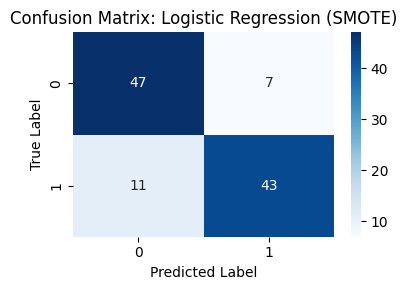


KNN
---
CV Precision: 90.73%
Validation Precision: 86.0%


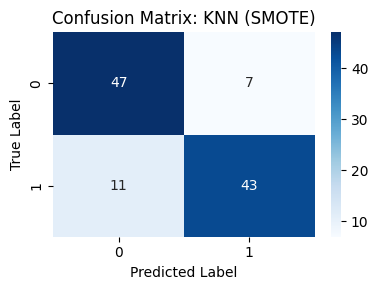


SVM
---
CV Precision: 90.73%
Validation Precision: 86.0%


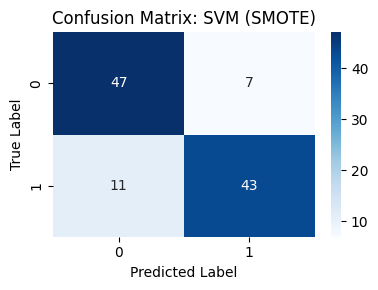


Naive Bayes
-----------
CV Precision: 89.61%
Validation Precision: 86.0%


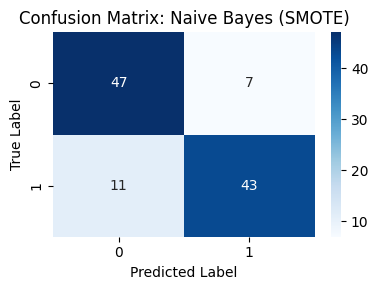


Decision Tree
-------------
CV Precision: 90.27%
Validation Precision: 86.0%


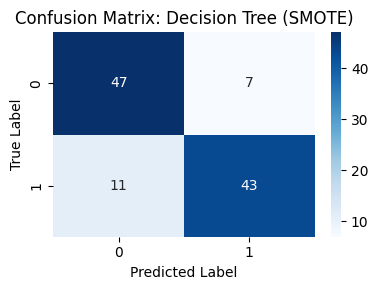


Random Forest
-------------
CV Precision: 90.83%
Validation Precision: 86.0%


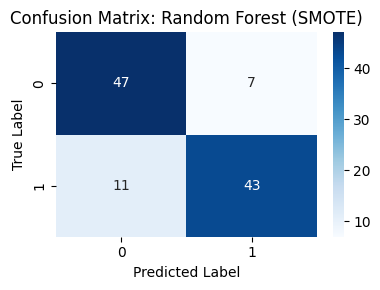

In [98]:
# SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Train-test split dari hasil SMOTE
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42
)

# Hanya pakai precision untuk cross-validation scoring
scoring = {
    'precision': make_scorer(precision_score)
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluasi model
for name, model in models.items():
    print(f"\n{name}")
    print("-" * len(name))

    # Cross-validation pakai precision
    scores = cross_validate(model, x_train_res, y_train_res, cv=5, scoring=scoring)
    avg_precision = round(np.mean(scores['test_precision']) * 100, 2)
    print(f"CV Precision: {avg_precision}%")

    # Fit dan evaluasi di validation set
    model.fit(x_train_res, y_train_res)
    y_pred_res = model.predict(x_val_res)

    val_precision = round(precision_score(y_val_res, y_pred_res) * 100, 2)
    print(f"Validation Precision: {val_precision}%")

    # Confusion matrix
    cm = confusion_matrix(y_val_res, y_pred_res)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name} (SMOTE)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

## Drop Missing Values

In [99]:
non_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  450 non-null    object 
 1   name      450 non-null    object 
 2   sex       450 non-null    object 
 3   age       450 non-null    float64
 4   family    450 non-null    object 
 5   title     450 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.6+ KB


In [100]:
df_cleaned = df_encoded[~df_encoded['name'].isin(missing['name'])]

In [101]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   survived              450 non-null    int64   
 1   name                  450 non-null    object  
 2   age                   450 non-null    float64 
 3   family                450 non-null    object  
 4   age_category          450 non-null    category
 5   age_category_encoded  450 non-null    int8    
 6   sex_female            450 non-null    int64   
 7   title_Col             450 non-null    int64   
 8   title_Dr              450 non-null    int64   
 9   title_Major           450 non-null    int64   
 10  title_Master          450 non-null    int64   
 11  title_Miss            450 non-null    int64   
 12  title_Mr              450 non-null    int64   
 13  title_Mrs             450 non-null    int64   
 14  title_Rev             450 non-null    int64   
 15  title_Royal

In [102]:
df_cleaned_cek = df_cleaned.drop(columns=['name','age','family','age_category'])

In [103]:
df_cleaned_cek.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   survived              450 non-null    int64
 1   age_category_encoded  450 non-null    int8 
 2   sex_female            450 non-null    int64
 3   title_Col             450 non-null    int64
 4   title_Dr              450 non-null    int64
 5   title_Major           450 non-null    int64
 6   title_Master          450 non-null    int64
 7   title_Miss            450 non-null    int64
 8   title_Mr              450 non-null    int64
 9   title_Mrs             450 non-null    int64
 10  title_Rev             450 non-null    int64
 11  title_Royal           450 non-null    int64
dtypes: int64(11), int8(1)
memory usage: 42.6 KB


In [104]:
x = df_cleaned.drop(columns=['survived', 'name','age','family','age_category'])
y = df_cleaned['survived']

### Tanpa SMOTE

In [105]:
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=32)


Logistic Regression
-------------------
CV Precision: 93.67%
Validation Precision: 82.61%


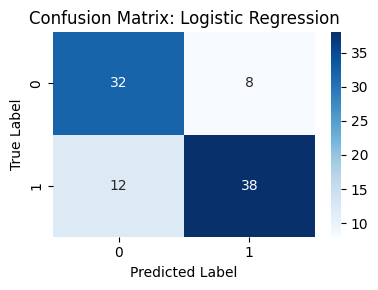


KNN
---
CV Precision: 94.8%
Validation Precision: 82.61%


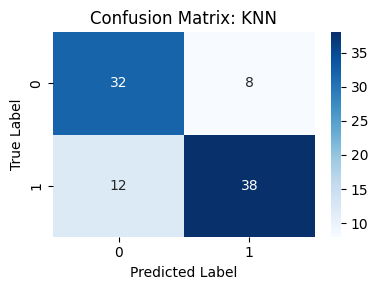


SVM
---
CV Precision: 94.85%
Validation Precision: 82.61%


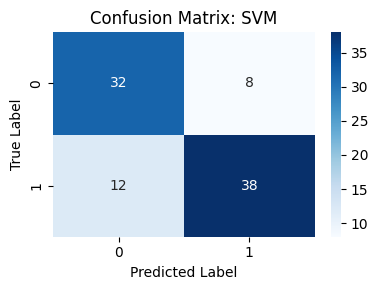


Naive Bayes
-----------
CV Precision: 89.99%
Validation Precision: 82.61%


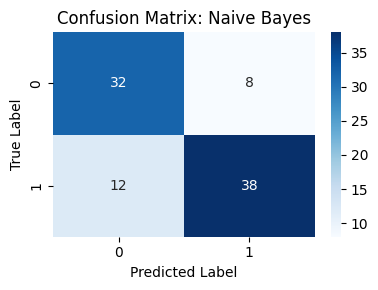


Decision Tree
-------------
CV Precision: 94.25%
Validation Precision: 81.82%


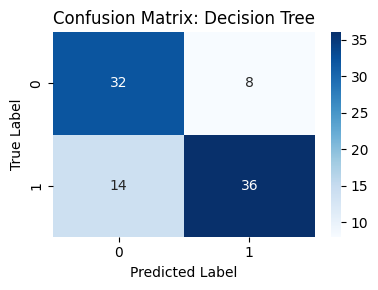


Random Forest
-------------
CV Precision: 93.67%
Validation Precision: 82.61%


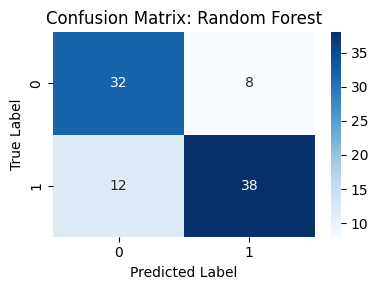

In [106]:
# Split data
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=32
)

# Hanya pakai precision untuk cross-validation scoring
scoring = {
    'precision': make_scorer(precision_score)
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    print(f"\n{name}")
    print("-" * len(name))

    # Cross-validation pakai precision
    scores = cross_validate(model, x_train, y_train, cv=5, scoring=scoring)
    avg_precision = round(np.mean(scores['test_precision']) * 100, 2)
    print(f"CV Precision: {avg_precision}%")

    # Fit model dan evaluasi di validation set
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    val_precision = round(precision_score(y_val, y_pred) * 100, 2)
    print(f"Validation Precision: {val_precision}%")

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


### Dengan SMOTE


Logistic Regression
-------------------
CV Precision: 90.9%
Validation Precision: 86.36%


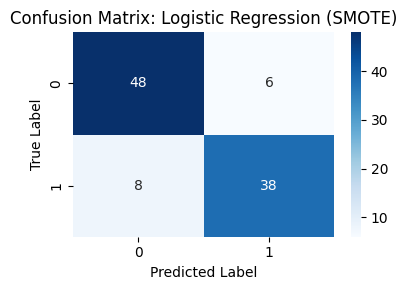


KNN
---
CV Precision: 78.08%
Validation Precision: 84.09%


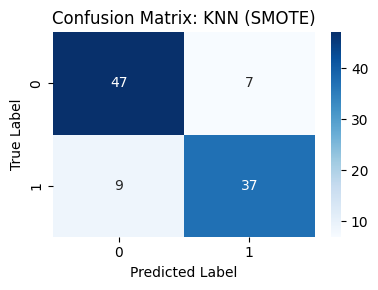


SVM
---
CV Precision: 91.35%
Validation Precision: 86.36%


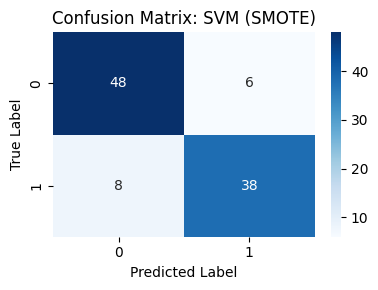


Naive Bayes
-----------
CV Precision: 81.55%
Validation Precision: 84.44%


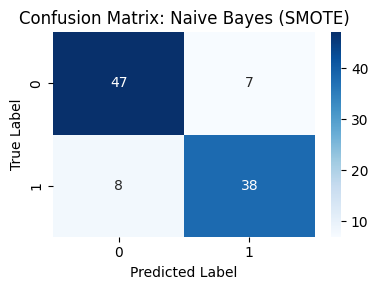


Decision Tree
-------------
CV Precision: 91.28%
Validation Precision: 84.44%


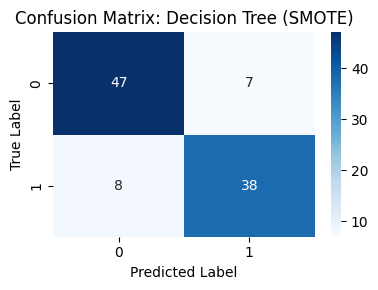


Random Forest
-------------
CV Precision: 91.35%
Validation Precision: 84.44%


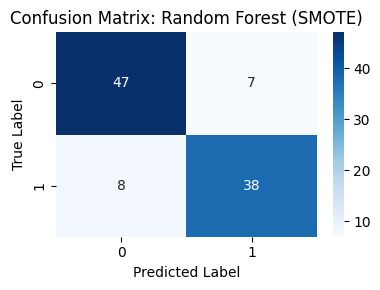

In [107]:
# SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Train-test split dari hasil SMOTE
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42
)

# Hanya pakai precision untuk cross-validation scoring
scoring = {
    'precision': make_scorer(precision_score)
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluasi model
for name, model in models.items():
    print(f"\n{name}")
    print("-" * len(name))

    # Cross-validation pakai precision
    scores = cross_validate(model, x_train_res, y_train_res, cv=5, scoring=scoring)
    avg_precision = round(np.mean(scores['test_precision']) * 100, 2)
    print(f"CV Precision: {avg_precision}%")

    # Fit dan evaluasi di validation set
    model.fit(x_train_res, y_train_res)
    y_pred_res = model.predict(x_val_res)

    val_precision = round(precision_score(y_val_res, y_pred_res) * 100, 2)
    print(f"Validation Precision: {val_precision}%")

    # Confusion matrix
    cm = confusion_matrix(y_val_res, y_pred_res)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name} (SMOTE)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()